In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from tqdm import tqdm
import datetime

In [4]:
sns.set_theme(context='talk', # sns.set_context("talk")
                  style='white', # sns.set_style("whitegrid")
#                   palette='RdBu',  # sns.set_palette(custom_palette)
                  font='Ubuntu', 
                  font_scale=1, 
                  color_codes=True, 
                  rc=None)

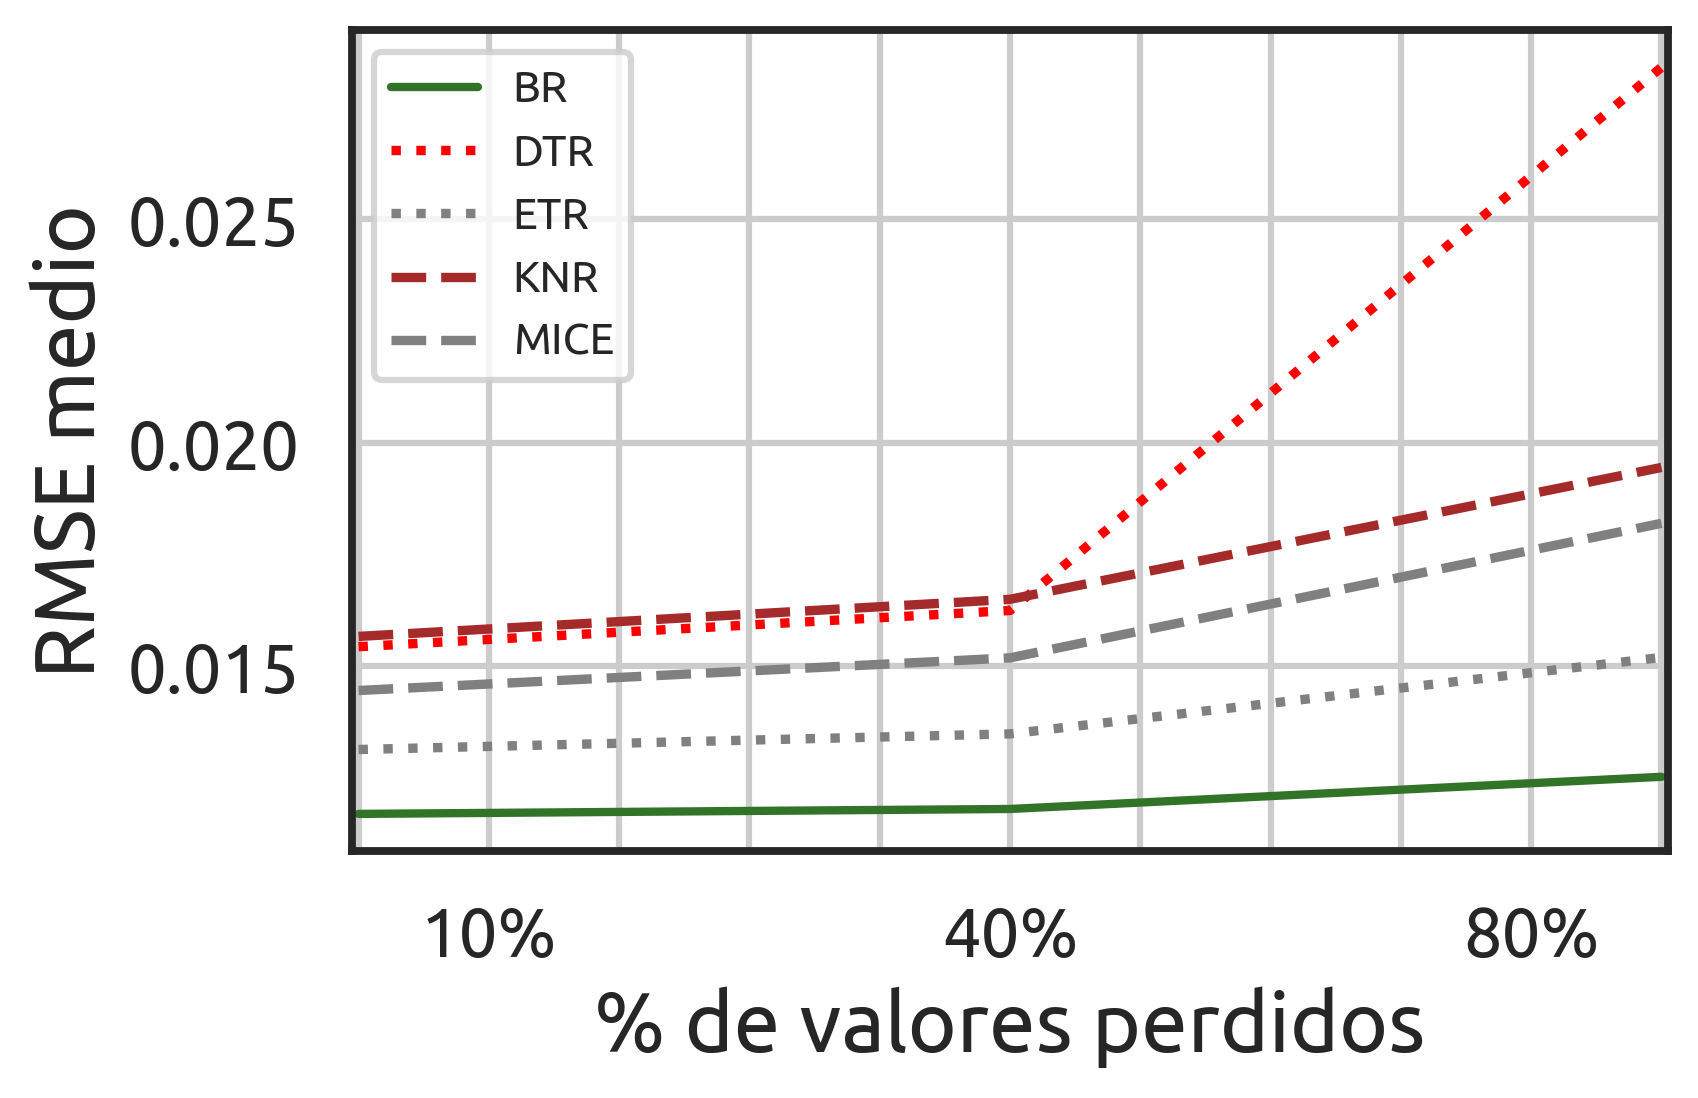

In [3]:
br = [0.0117, 0.01181, 0.01253]
dtr = [0.01544, 0.01625, 0.0284]
etr = [0.01314, 0.01349, 0.0152]
knr = [0.01567, 0.0165, 0.01945]
mice = [0.01446, 0.01519, 0.0182]

lw = 2
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
ax.plot(br, label="BR", linewidth=lw, color='#317428')
ax.plot(dtr, label="DTR", color='red', ls=':')
ax.plot(etr, label="ETR", color='grey', ls=':')
ax.plot(knr, label="KNR", color='brown', ls='--')
ax.plot(mice, label="MICE", color='grey', ls='--')
ax.legend( fontsize ='xx-small', loc='best')#bbox_to_anchor=(0.675, 0.2, 0.5, 0.5))
# labels = ["BR", "DTR", "ETR", "KNR", "MICE"]
# plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5,0.5))
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax.set_xticklabels(["", "10%", "", "", "", "40%", "", "", "", "80%", ""])
# ax.set_yticklabels(["", "10%", "", "", "", "40%", "", "", "", "80%"])

ax.set_xlabel("% de valores perdidos", fontdict={'fontsize':20})
ax.set_ylabel("RMSE medio", fontdict={'fontsize':20})
ax.grid(True, 'both')
ax.set_xlim(-0.01,2.01)
fig.tight_layout()
fig.savefig("/home/marcelo/GitRepos/Tesis/Imputation_graph.png", format='png', dpi=300, transparent=True)
 
plt.show()

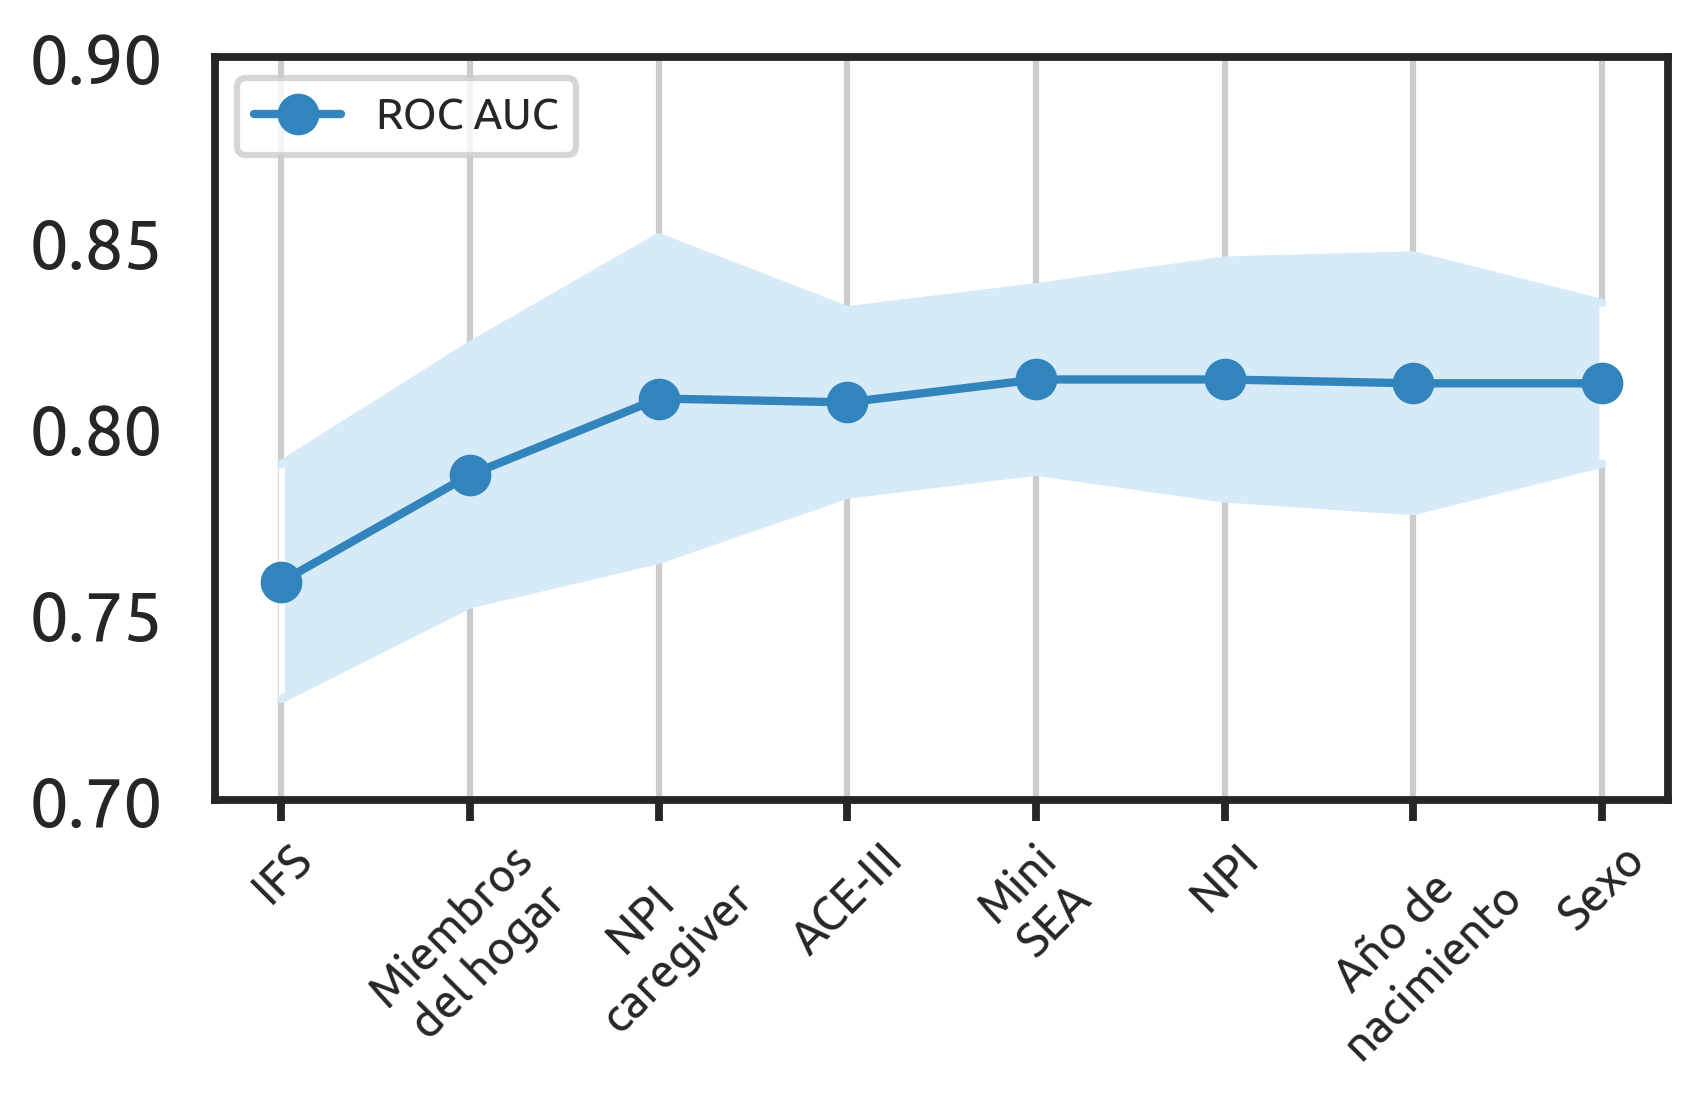

In [54]:
variables = ['IFS', "Miembros\ndel hogar", "NPI\ncaregiver", "ACE-III", "Mini\nSEA", "NPI", "Año de\nnacimiento", "Sexo"]
x = np.linspace(0,1, 8)
pm = [0.75875, 0.78749, 0.808031, 0.806996, 0.813156, 0.813156, 0.812127, 0.812124]
intervalo = [0.0356, 0.0392, 0.049, 0.028, 0.02804, 0.036, 0.0389, 0.0243]
ds = [0.0158, 0.0174, 0.0217, 0.0124, 0.0124, 0.016, 0.0172, 0.0108]
pm_min_2 = np.array(pm) - (np.array(ds) *2)
pm_mas_2 = np.array(pm) + (np.array(ds) *2)

lw = 2
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
ax.plot(x,  pm, label="ROC AUC", linewidth=lw, color='#3285bc', marker='o')
ax.plot(x,  pm_min_2, linewidth=lw, color='#d6eaf8')
ax.plot(x,  pm_mas_2, linewidth=lw, color='#d6eaf8')

ax.fill_between(np.linspace(0, 1, 8), pm_mas_2, pm, where=pm_mas_2 >= pm, facecolor="#d6eaf8", interpolate=True)
ax.fill_between(np.linspace(0, 1, 8), pm_min_2, pm, where=pm >= pm_min_2, facecolor="#d6eaf8", interpolate=True)

ax.legend( fontsize ='xx-small', loc=2)#bbox_to_anchor=(0.675, 0.2, 0.5, 0.5))
# plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5,0.5))
ax.set_xticks(x) 
ax.set_xticklabels(variables, rotation=45, fontsize=11)

# ax.set_xlabel("% de valores perdidos", fontdict={'fontsize':20})
# ax.set_ylabel("RMSE medio", fontdict={'fontsize':20})
ax.grid(True, 'major', 'x')
ax.tick_params(axis='x', which='both', length=5)  # Ajustar la longitud de los ticks
ax.set_ylim((0.7, 0.9))
# ax.set_xlim(-0.01,2.01)
 
plt.tick_params(
axis='x',          # changes apply to the x-axis
# which='both',      # both major and minor ticks are affected
bottom=True,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
labelbottom=True) # labels along the bottom edge are off

fig.tight_layout()
fig.savefig("/home/marcelo/GitRepos/Tesis/SFS_graph.png", format='png', dpi=300, transparent=True)
plt.show()